<a href="https://colab.research.google.com/github/jhordi19/Ciencia_de_datos/blob/Taller_2025/Taller_Sem08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


###Cargar y preparar datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cargar dataset
df = pd.read_csv("dataset_balanceado_smote1.csv")

# Separar características y etiqueta
X = df.drop(columns=['Hypertension'])
y = df['Hypertension']

# División en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
df.head()

,Age,Sex,BMI,Salt,PhysActivity,Smoker,MentHlth,Alcohol,Vaper,Diabetes,HighChol,Hypertension
0,10.0,0.0,34.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,1
1,13.0,1.0,26.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,0.0,0
2,10.0,1.0,28.0,1.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0
3,11.0,1.0,36.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0
4,8.0,0.0,33.0,1.0,1.0,4.0,5.0,1.0,3.0,0.0,1.0,1


###Entrenamiento con AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

final_model_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=0.8,
    random_state=42
)

final_model_ada.fit(x_train, y_train)
y_pred_ada = final_model_ada.predict(x_test)

print("📄 Reporte final - AdaBoost:")
print(classification_report(y_test, y_pred_ada, target_names=["No Hipertenso", "Hipertenso"]))


📄 Reporte final - AdaBoost:
               precision    recall  f1-score   support

No Hipertenso       0.73      0.73      0.73      2653
   Hipertenso       0.74      0.74      0.74      2783

     accuracy                           0.74      5436
    macro avg       0.74      0.74      0.74      5436
 weighted avg       0.74      0.74      0.74      5436



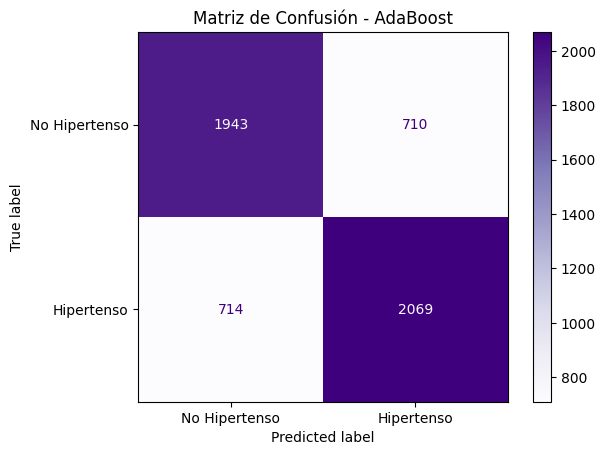

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=["No Hipertenso", "Hipertenso"])
disp_ada.plot(cmap=plt.cm.Purples)
plt.title("Matriz de Confusión - AdaBoost")
plt.show()

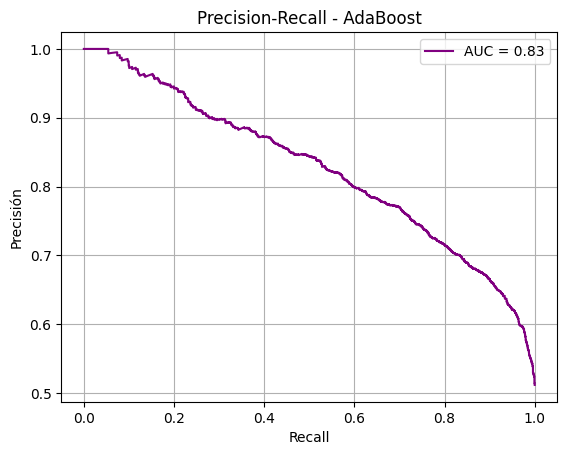

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_proba_ada = final_model_ada.predict_proba(x_test)[:, 1]
precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_proba_ada)
pr_auc_ada = auc(recall_ada, precision_ada)

plt.figure()
plt.plot(recall_ada, precision_ada, color='purple', label=f"AUC = {pr_auc_ada:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precision-Recall - AdaBoost")
plt.legend()
plt.grid()
plt.show()


###Entrenamiento con CatBoost

In [ ]:
from catboost import CatBoostClassifier

final_model_cat = CatBoostClassifier(
    iterations=500,             # número de árboles
    learning_rate=0.05,         # más bajo para más precisión
    depth=6,                    # buena profundidad sin overfitting
    l2_leaf_reg=3,              # regularización L2 para evitar sobreajuste
    loss_function='Logloss',    # para clasificación binaria
    verbose=0,
    random_state=42
)
final_model_cat.fit(x_train, y_train)

y_pred_cat = final_model_cat.predict(x_test)

print("📄 Reporte final - CatBoost:")
print(classification_report(y_test, y_pred_cat, target_names=["No Hipertenso", "Hipertenso"]))


📄 Reporte final - CatBoost:
               precision    recall  f1-score   support

No Hipertenso       0.73      0.74      0.74      2653
   Hipertenso       0.75      0.74      0.74      2783

     accuracy                           0.74      5436
    macro avg       0.74      0.74      0.74      5436
 weighted avg       0.74      0.74      0.74      5436



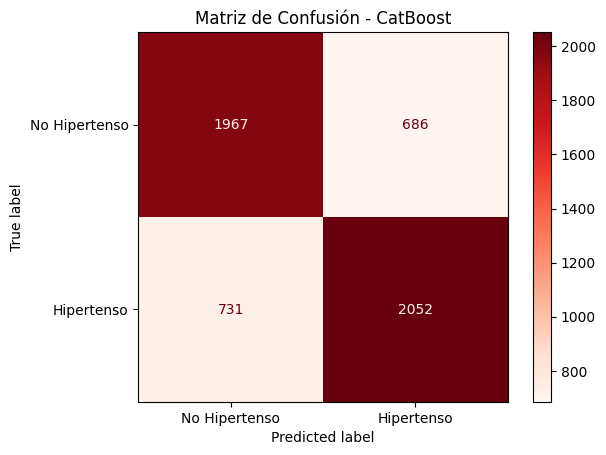

In [ ]:
cm_cat = confusion_matrix(y_test, y_pred_cat)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=["No Hipertenso", "Hipertenso"])
disp_cat.plot(cmap=plt.cm.Reds)
plt.title("Matriz de Confusión - CatBoost")
plt.show()

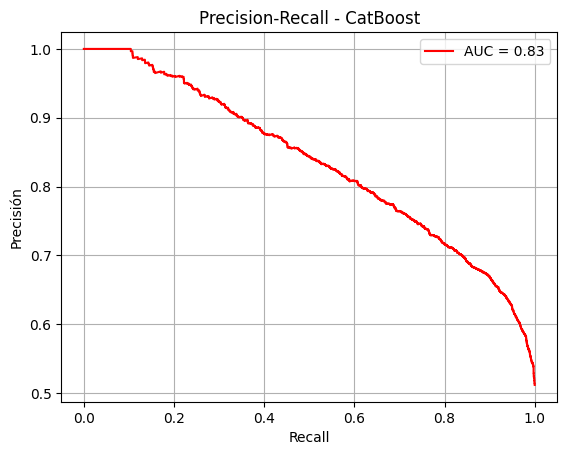

In [ ]:
y_proba_cat = final_model_cat.predict_proba(x_test)[:, 1]
precision_cat, recall_cat, _ = precision_recall_curve(y_test, y_proba_cat)
pr_auc_cat = auc(recall_cat, precision_cat)

plt.figure()
plt.plot(recall_cat, precision_cat, color='red', label=f"AUC = {pr_auc_cat:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precision-Recall - CatBoost")
plt.legend()
plt.grid()
plt.show()

###Entrenamiento con LightGBM

In [ ]:
from lightgbm import LGBMClassifier

final_model_lgbm = LGBMClassifier(
    n_estimators=500,           # más árboles para mayor cobertura
    learning_rate=0.05,         # baja tasa de aprendizaje
    max_depth=6,                # control del overfitting
    num_leaves=31,              # recomendado para max_depth=6
    min_child_samples=5,       # tamaño mínimo para división
    subsample=0.8,              # usar 80% de datos por iteración (bagging)
    colsample_bytree=0.8,       # usar 80% de columnas por árbol
    random_state=42,
    verbose=-1
)
final_model_lgbm.fit(x_train, y_train)

y_pred_lgbm = final_model_lgbm.predict(x_test)

print("📄 Reporte final - LightGBM:")
print(classification_report(y_test, y_pred_lgbm, target_names=["No Hipertenso", "Hipertenso"]))


📄 Reporte final - LightGBM:
               precision    recall  f1-score   support

No Hipertenso       0.72      0.74      0.73      2653
   Hipertenso       0.75      0.73      0.74      2783

     accuracy                           0.74      5436
    macro avg       0.74      0.74      0.74      5436
 weighted avg       0.74      0.74      0.74      5436



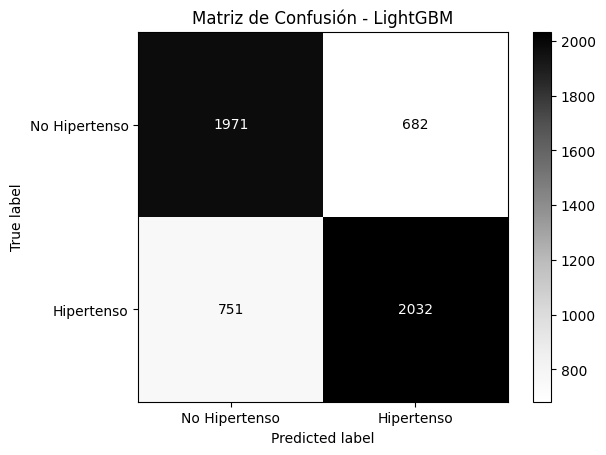

In [ ]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=["No Hipertenso", "Hipertenso"])
disp_lgbm.plot(cmap=plt.cm.Greys)
plt.title("Matriz de Confusión - LightGBM")
plt.show()

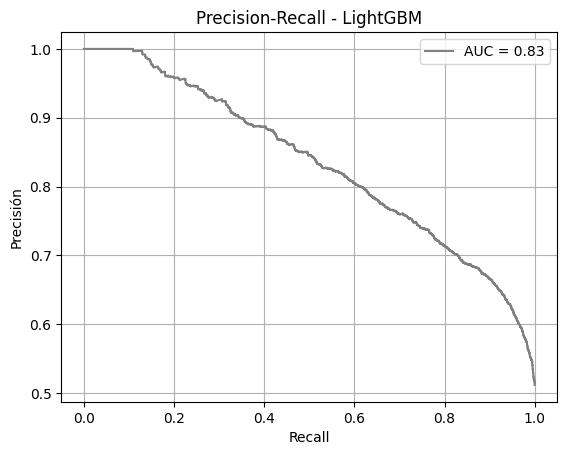

In [ ]:
y_proba_lgbm = final_model_lgbm.predict_proba(x_test)[:, 1]
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_proba_lgbm)
pr_auc_lgbm = auc(recall_lgbm, precision_lgbm)

plt.figure()
plt.plot(recall_lgbm, precision_lgbm, color='grey', label=f"AUC = {pr_auc_lgbm:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precision-Recall - LightGBM")
plt.legend()
plt.grid()
plt.show()


## Evaluación de los modelos


📊 Evaluación para AdaBoost
✅ AUC-ROC: 0.8210
📉 Log Loss (Entrenamiento): 0.6214
📉 Log Loss (Prueba): 0.6220
⏱️ Tiempo de inferencia promedio: 0.045491 ms


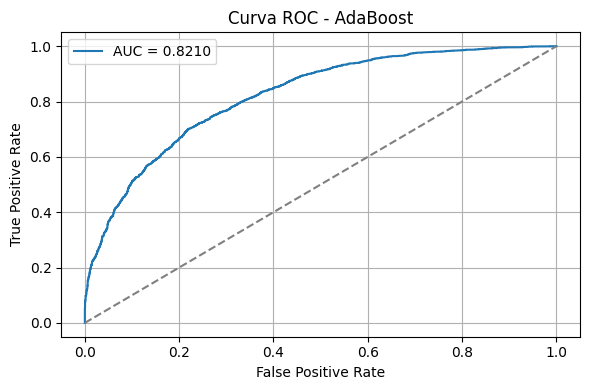


📊 Evaluación para CatBoost
✅ AUC-ROC: 0.8248
📉 Log Loss (Entrenamiento): 0.4747
📉 Log Loss (Prueba): 0.5083
⏱️ Tiempo de inferencia promedio: 0.002535 ms


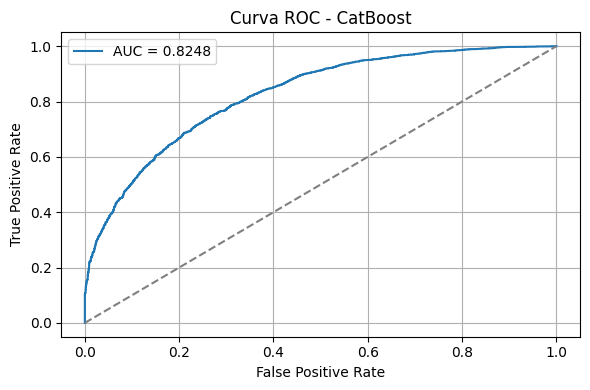


📊 Evaluación para LightGBM
✅ AUC-ROC: 0.8231
📉 Log Loss (Entrenamiento): 0.4492
📉 Log Loss (Prueba): 0.5108
⏱️ Tiempo de inferencia promedio: 0.060335 ms


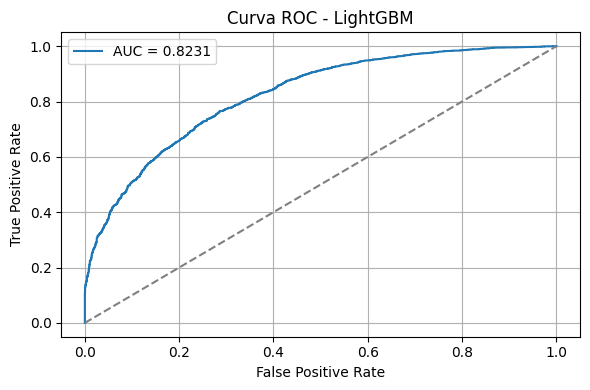

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
import matplotlib.pyplot as plt
import time

def evaluar_modelo(nombre, modelo, x_train, y_train, x_test, y_test):
    print(f"\n📊 Evaluación para {nombre}")

    # 1. AUC-ROC
    y_proba_test = modelo.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)

    # 2. Log loss (tasa de pérdida)
    y_proba_train = modelo.predict_proba(x_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_test = log_loss(y_test, y_proba_test)

    # 3. Tiempo de inferencia promedio
    start_time = time.time()
    _ = modelo.predict(x_test)
    end_time = time.time()
    tiempo_prom = (end_time - start_time) / len(x_test) * 1000  # en milisegundos

    # Resultados
    print(f"✅ AUC-ROC: {auc:.4f}")
    print(f"📉 Log Loss (Entrenamiento): {loss_train:.4f}")
    print(f"📉 Log Loss (Prueba): {loss_test:.4f}")
    print(f"⏱️ Tiempo de inferencia promedio: {tiempo_prom:.6f} ms")

    # Gráfico AUC-ROC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {nombre}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ejecutar evaluaciones
evaluar_modelo("AdaBoost", final_model_ada, x_train, y_train, x_test, y_test)
evaluar_modelo("CatBoost", final_model_cat, x_train, y_train, x_test, y_test)
evaluar_modelo("LightGBM", final_model_lgbm, x_train, y_train, x_test, y_test)


📋 Tabla comparativa de métricas (AdaBoost, CatBoost, LightGBM):


,Modelo,Accuracy,Precision,Recall,F1-score
0,AdaBoost,0.738043,0.744512,0.743442,0.743977
1,CatBoost,0.739330,0.749452,0.737334,0.743344
2,LightGBM,0.736387,0.748710,0.730147,0.739312


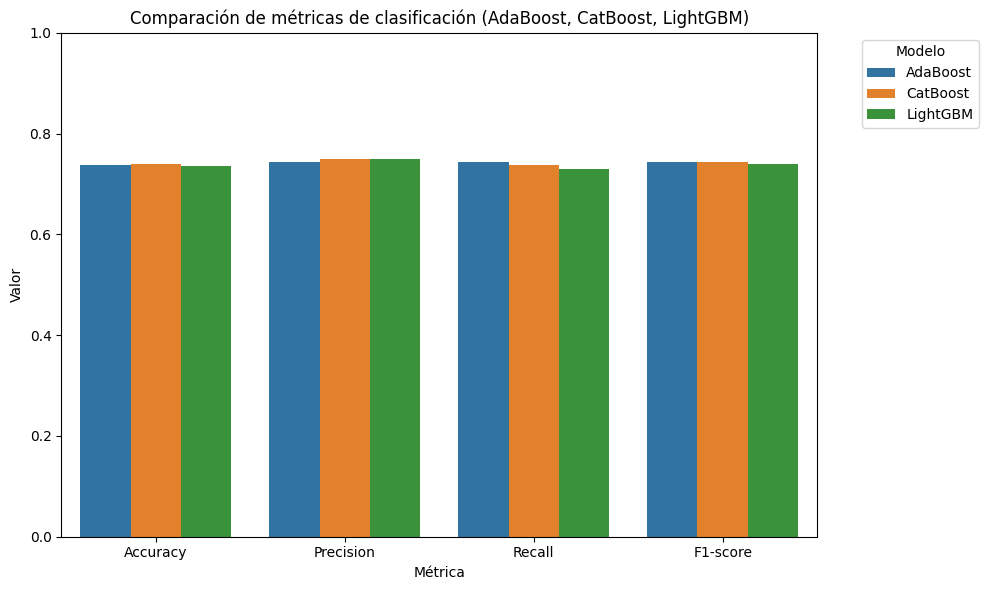

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para obtener métricas
def obtener_metricas_clasificacion(nombre, modelo, x_test, y_test):
    y_pred = modelo.predict(x_test)
    return {
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

# Obtener métricas solo para AdaBoost, CatBoost y LightGBM
metricas_ada = obtener_metricas_clasificacion("AdaBoost", final_model_ada, x_test, y_test)
metricas_cat = obtener_metricas_clasificacion("CatBoost", final_model_cat, x_test, y_test)
metricas_lgbm = obtener_metricas_clasificacion("LightGBM", final_model_lgbm, x_test, y_test)

# Crear DataFrame
df_metricas_clas = pd.DataFrame([metricas_ada, metricas_cat, metricas_lgbm])

# Mostrar tabla
print("📋 Tabla comparativa de métricas (AdaBoost, CatBoost, LightGBM):")
display(df_metricas_clas)

# Gráfico de barras agrupadas
df_melted = df_metricas_clas.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Métrica', y='Valor', hue='Modelo')
plt.ylim(0, 1)
plt.title("Comparación de métricas de clasificación (AdaBoost, CatBoost, LightGBM)")
plt.ylabel("Valor")
plt.xlabel("Métrica")
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###Exportar modelos

In [ ]:
import joblib

# Exportar modelo AdaBoost
joblib.dump(final_model_ada, "modelo_adaboost_actualizado.pkl")
print("✅ Modelo AdaBoost exportado como 'modelo_adaboost.pkl'")

# Exportar modelo CatBoost
joblib.dump(final_model_cat, "modelo_catboost_actualizado.pkl")
print("✅ Modelo CatBoost exportado como 'modelo_catboost.pkl'")

# Exportar modelo LightGBM
joblib.dump(final_model_lgbm, "modelo_lightgbm_actualizado.pkl")
print("✅ Modelo LightGBM exportado como 'modelo_lightgbm.pkl'")

✅ Modelo AdaBoost exportado como 'modelo_adaboost.pkl'
✅ Modelo CatBoost exportado como 'modelo_catboost.pkl'
✅ Modelo LightGBM exportado como 'modelo_lightgbm.pkl'


###Cargar modelos

In [ ]:
# Cargar modelos desde archivos .pkl
modelo_ada = joblib.load("modelo_adaboost_actualizado.pkl")
modelo_cat = joblib.load("modelo_catboost_actualizado.pkl")
modelo_lgbm = joblib.load("modelo_lightgbm_actualizado.pkl")

###Pruebas con los modelos

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import joblib

# === 1. Cargar el modelo previamente exportado ===
modelo = joblib.load("modelo_catboost_actualizado.pkl")  # Cambia por otro si es necesario

# === 2. Datos de entrada manuales (simulan una persona) ===
# Grupo de edad => [1: 18-24] [2: 25-29] [3: 30-34] [4: 35-39] [5: 40-44] [6: 45-49] [7: 50-54] [8: 55-59] [9: 60-64] [10: 65-69] [11: 70-74] [12: 75-79] [13: 80-100]
Age = 9
Sex = 0
BMI = 31.25
MentHlth = 6
Salt = 0
PhysActivity = 0
Smoker = 4
Vaper = 4
Alcohol = 1
Diabetes = 1
HighChol = 1

# === 3. Crear DataFrame con los nombres correctos de columnas ===
columnas = ['Age', 'Sex', 'BMI', 'Salt', 'PhysActivity',
            'Smoker', 'MentHlth', 'Alcohol', 'Vaper', 'Diabetes', 'HighChol']

xnew = pd.DataFrame([[
    Age, Sex, BMI, MentHlth, Salt, PhysActivity,
    Smoker, Vaper, Alcohol, Diabetes, HighChol
]], columns=columnas)

# === 4. Realizar predicción y obtener probabilidad ===
proba = modelo.predict_proba(xnew)[0][1]
y_pred = modelo.predict(xnew)[0]

# === 5. Clasificación del nivel de riesgo ===
if proba < 0.35:
    riesgo = 'Bajo'
elif proba < 0.65:
    riesgo = 'Moderado'
else:
    riesgo = 'Alto'

# === 6. Mensaje personalizado ===
if y_pred == 0:
    mensaje = '✅ Felicidades: No eres propenso a desarrollar hipertensión arterial.'
else:
    mensaje = '⚠️ A tomar precauciones: Eres propenso a desarrollar hipertensión arterial.'

# === 7. Mostrar resultados ===
print(f"🔮 Predicción: {y_pred} (0 = Sano, 1 = Hipertenso)")
print(f"📈 Probabilidad de riesgo: {proba * 100:.2f}%")
print(f"📊 Nivel de riesgo: {riesgo}")
print(mensaje)

🔮 Predicción: 1 (0 = Sano, 1 = Hipertenso)
📈 Probabilidad de riesgo: 89.70%
📊 Nivel de riesgo: Alto
⚠️ A tomar precauciones: Eres propenso a desarrollar hipertensión arterial.
